# AirBnB Pricing Singapore

### Breakdown:
#### 1. Data Cleaning
* Removing duplicates
* Perform checking of null values
* Perform checking of missing data
* Dropping unnecessary columns
* Removing NaN values
* Transforming data
#### 2. Data Visualization
* Get Correlation between different variables
* Plot all Neighbourhood Group
* Neighbourhood
* Room Type
* Relation between neighbourgroup and Availability of Room
* Map of Neighbourhood group
* Map of Neighbourhood
* Availabity of rooom
#### 3. Regression Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.image as matimage
%matplotlib inline

import seaborn as sns

### Loading in dataset

In [2]:
#Read the data
airbnb = pd.read_csv(r'C:\Users\Jey\Documents\Analyst Dataset\Singapore_listings_2023.csv')

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,71609,Villa in Singapore · ★4.44 · 2 bedrooms · 3 be...,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,150.0,92,19,2020-01-17,0.13,5,55,0,NaN
1,71896,Home in Singapore · ★4.16 · 1 bedroom · 1 bed ...,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,80.0,92,24,2019-10-13,0.16,5,91,0,NaN
2,71903,Home in Singapore · ★4.41 · 1 bedroom · 2 beds...,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,80.0,92,46,2020-01-09,0.30,5,91,0,NaN
3,275343,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,1439258,Kay,Central Region,Bukit Merah,1.29015,103.80814,Private room,64.0,60,20,2022-08-13,0.15,51,183,0,S0399
4,275344,Rental unit in Singapore · ★4.27 · 1 bedroom ·...,1439258,Kay,Central Region,Bukit Merah,1.28836,103.81144,Private room,78.0,60,16,2023-08-16,0.11,51,183,3,S0399


In [4]:
#Identifying the numbers of rows and columns
airbnb.shape

(3457, 18)

In [5]:
##Retrieve the Column Data Types
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3457 entries, 0 to 3456
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3457 non-null   int64  
 1   name                            3457 non-null   object 
 2   host_id                         3457 non-null   int64  
 3   host_name                       3457 non-null   object 
 4   neighbourhood_group             3457 non-null   object 
 5   neighbourhood                   3457 non-null   object 
 6   latitude                        3457 non-null   float64
 7   longitude                       3457 non-null   float64
 8   room_type                       3457 non-null   object 
 9   price                           3329 non-null   float64
 10  minimum_nights                  3457 non-null   int64  
 11  number_of_reviews               3457 non-null   int64  
 12  last_review                     18

In [7]:
##Removing duplicates
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [8]:
##Check for null values in each column
airbnb.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              128
minimum_nights                       0
number_of_reviews                    0
last_review                       1611
reviews_per_month                 1611
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2070
dtype: int64

In [9]:
##Check for missing values in percentage for each column
for col in airbnb.columns:
    percent_missing = np.mean(airbnb[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

id - 0%
name - 0%
host_id - 0%
host_name - 0%
neighbourhood_group - 0%
neighbourhood - 0%
latitude - 0%
longitude - 0%
room_type - 0%
price - 4%
minimum_nights - 0%
number_of_reviews - 0%
last_review - 47%
reviews_per_month - 47%
calculated_host_listings_count - 0%
availability_365 - 0%
number_of_reviews_ltm - 0%
license - 60%


In [10]:
##Dropping unnecessary columns
airbnb.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [11]:
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,367042,East Region,Tampines,1.34537,103.95887,Private room,150.0,92,19,0.13,5,55,0,NaN
1,367042,East Region,Tampines,1.34754,103.95958,Private room,80.0,92,24,0.16,5,91,0,NaN
2,367042,East Region,Tampines,1.34531,103.96100,Private room,80.0,92,46,0.30,5,91,0,NaN
3,1439258,Central Region,Bukit Merah,1.29015,103.80814,Private room,64.0,60,20,0.15,51,183,0,S0399
4,1439258,Central Region,Bukit Merah,1.28836,103.81144,Private room,78.0,60,16,0.11,51,183,3,S0399


In [12]:
##Removing NaN values from the dataset
##Replace all review_per_month NaN elements with 0
airbnb.fillna({'reviews_per_month': 0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()

0

In [13]:
print(airbnb['reviews_per_month'])

0       0.13
1       0.16
2       0.30
3       0.15
4       0.11
        ... 
3452    0.00
3453    0.00
3454    0.00
3455    0.00
3456    0.00
Name: reviews_per_month, Length: 3457, dtype: float64


In [14]:
##Drop any NAN elements presents in rows or columns
airbnb.isnull().sum()
airbnb.dropna(how='any', inplace=True)
#airbnb.replace([np.nan, -np.inf], "None", inplace=True)
airbnb

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3,1439258,Central Region,Bukit Merah,1.290150,103.808140,Private room,64.0,60,20,0.15,51,183,0,S0399
4,1439258,Central Region,Bukit Merah,1.288360,103.811440,Private room,78.0,60,16,0.11,51,183,3,S0399
7,1439258,Central Region,Bukit Merah,1.288280,103.810200,Private room,75.0,60,17,0.12,51,183,1,S0399
8,1439258,Central Region,Bukit Merah,1.286360,103.811380,Private room,69.0,60,5,0.04,51,183,2,S0399
23,1439258,Central Region,Bukit Merah,1.290650,103.809410,Private room,55.0,60,16,0.13,51,183,1,S0399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,138649185,Central Region,River Valley,1.297097,103.837137,Entire home/apt,429.0,6,0,0.00,260,269,0,Authorised Serviced Apartment
3453,138649185,Central Region,River Valley,1.299260,103.836860,Entire home/apt,479.0,6,0,0.00,260,269,0,Authorised Serviced Apartment
3454,138649185,Central Region,River Valley,1.297453,103.838410,Entire home/apt,408.0,6,0,0.00,260,269,0,Authorised Serviced Apartment
3455,25375339,Central Region,Bishan,1.353559,103.832710,Private room,50.0,25,0,0.00,12,365,0,S1234


In [15]:
#Examining continuous variables
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.362000e+03,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,2.112122e+08,1.303180,103.840600,371.692364,15.788546,12.500000,0.595228,55.093245,269.860499,5.760646
std,1.774141e+08,0.027897,0.036019,586.885511,32.104979,40.620377,1.533739,81.328333,119.162093,18.871544
min,8.005580e+05,1.221690,103.634572,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.907850e+07,1.288415,103.836387,154.000000,1.000000,0.000000,0.000000,6.000000,186.250000,0.000000
50%,1.386492e+08,1.297670,103.843953,253.000000,2.000000,1.000000,0.110000,18.000000,333.500000,0.000000
75%,3.670438e+08,1.307995,103.854492,380.000000,6.000000,8.000000,0.600000,53.000000,360.000000,3.000000
max,5.502843e+08,1.453064,103.985969,6225.000000,365.000000,757.000000,29.620000,260.000000,365.000000,396.000000


In [16]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

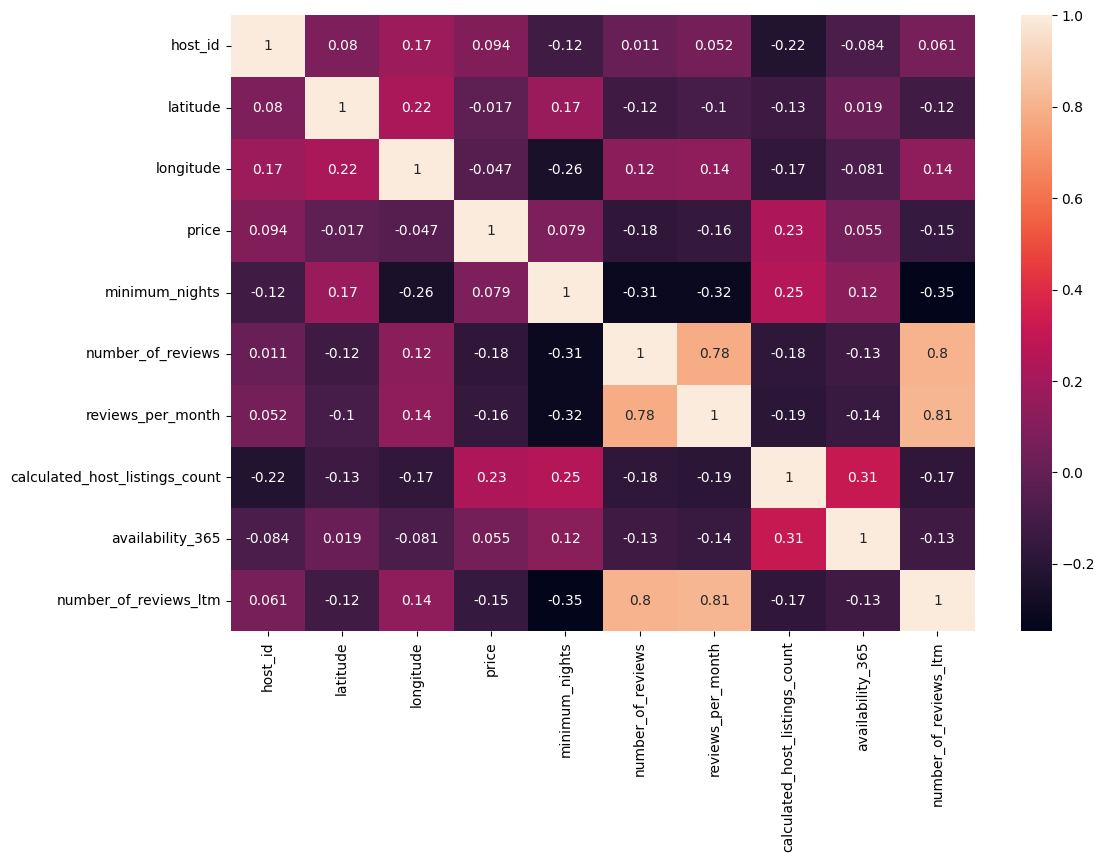

In [17]:
#Correlation Between Two Variables
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [18]:
airbnb.shape

(1362, 14)

In [19]:
airbnb.head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3,1439258,Central Region,Bukit Merah,1.290150,103.808140,Private room,64.0,60,20,0.15,51,183,0,S0399
4,1439258,Central Region,Bukit Merah,1.288360,103.811440,Private room,78.0,60,16,0.11,51,183,3,S0399
7,1439258,Central Region,Bukit Merah,1.288280,103.810200,Private room,75.0,60,17,0.12,51,183,1,S0399
8,1439258,Central Region,Bukit Merah,1.286360,103.811380,Private room,69.0,60,5,0.04,51,183,2,S0399
23,1439258,Central Region,Bukit Merah,1.290650,103.809410,Private room,55.0,60,16,0.13,51,183,1,S0399
62,12067440,Central Region,Kallang,1.311700,103.860280,Private room,105.0,1,86,0.75,13,355,7,S0251
63,12067440,Central Region,Kallang,1.311700,103.860280,Private room,130.0,1,74,0.74,13,348,8,S0251
64,12067440,Central Region,Kallang,1.311700,103.860280,Private room,105.0,1,36,0.37,13,361,17,S0251
67,1439258,Central Region,Queenstown,1.280500,103.784390,Private room,104.0,60,17,0.17,51,243,2,S0399
80,12067440,Central Region,Kallang,1.311790,103.860020,Private room,105.0,1,276,3.20,13,361,50,S0251


### Data Visualization

In [20]:
airbnb['neighbourhood_group'].unique()

array(['Central Region', 'West Region', 'East Region', 'North Region',
       'North-East Region'], dtype=object)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

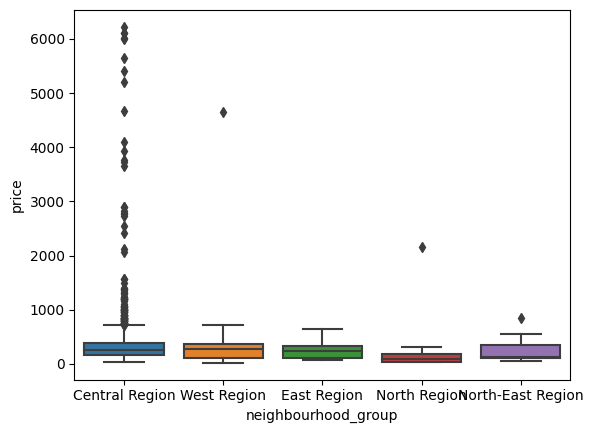

In [21]:
sns.boxplot(x="neighbourhood_group", y="price", data=airbnb)

Text(0.5, 1.0, 'Total Neighbourhood Group')

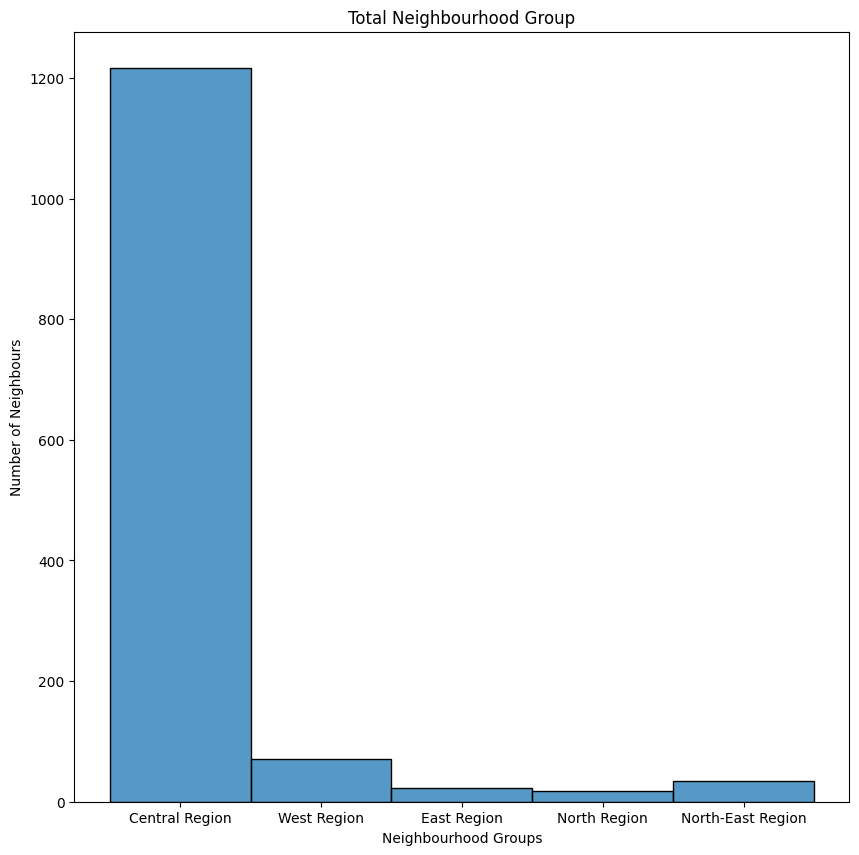

In [22]:
#Ploting neighbourhood group
#sns.displot(airbnb['neighbourhood_group'], palette="plasma")
neig = sns.histplot(data=airbnb['neighbourhood_group'])
neig.set(xlabel="Neighbourhood Groups", ylabel="Number of Neighbours")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Total Neighbourhood Group')

Text(0.5, 1.0, 'Types of Room')

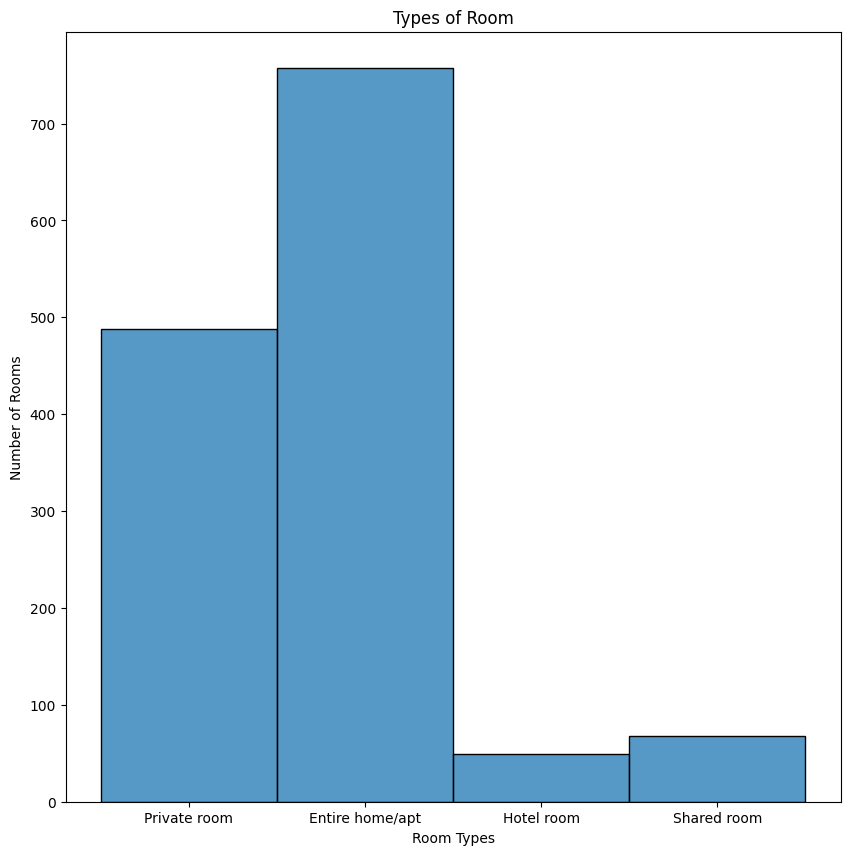

In [23]:
#Plotting room type
room = sns.histplot(airbnb['room_type'])
room.set(xlabel="Room Types", ylabel="Number of Rooms")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Types of Room')

[Text(0.5, 0, 'Neighbourhood Group'), Text(0, 0.5, 'Room Available')]

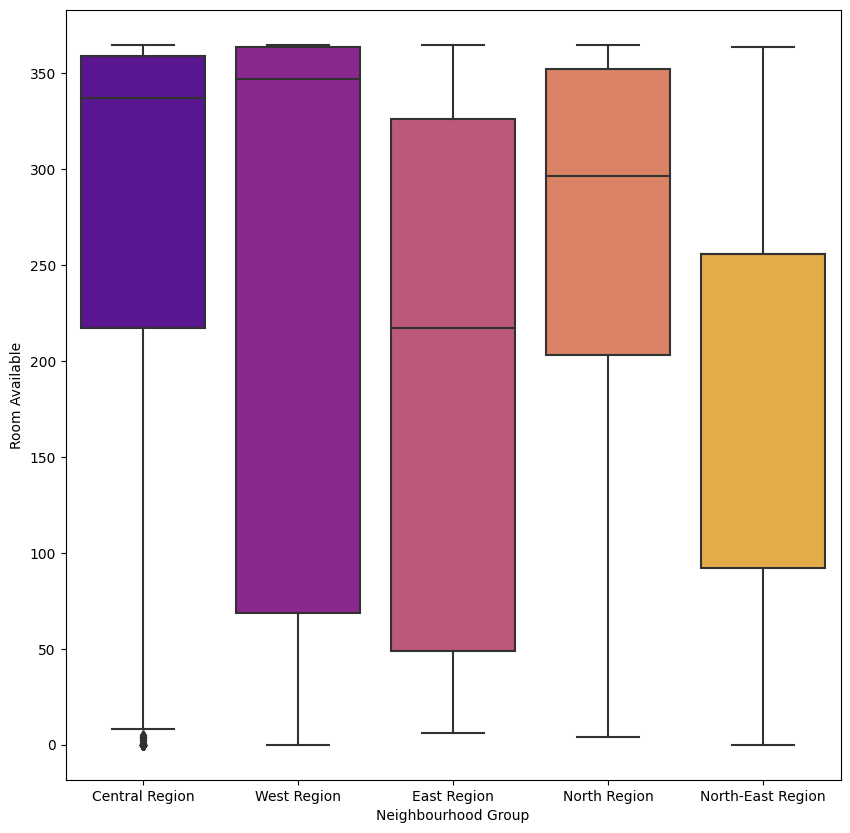

In [24]:
#Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(10,10))
neigxar = sns.boxplot(data=airbnb, x='neighbourhood_group', y='availability_365', palette='plasma')
neigxar.set(xlabel="Neighbourhood Group", ylabel="Room Available")

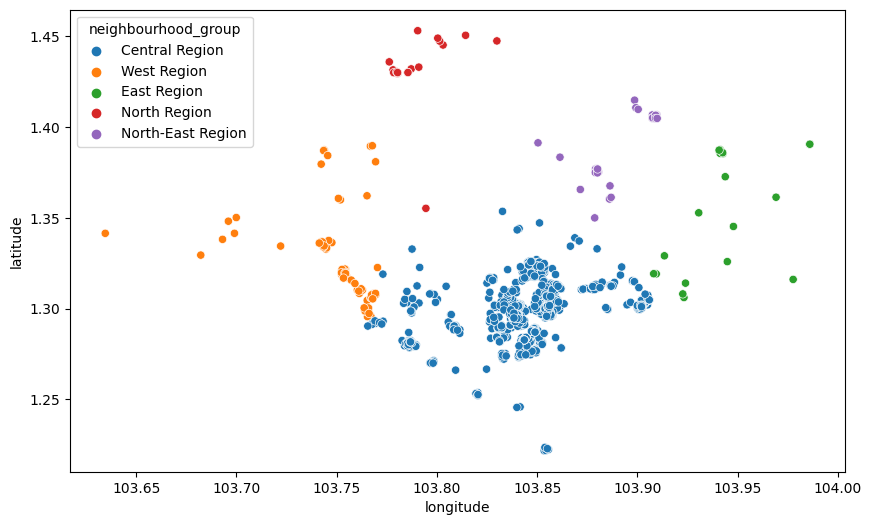

In [25]:
#Map of neighbourhood group
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb['longitude'], y=airbnb['latitude'], hue=airbnb['neighbourhood_group'])
plt.ioff()

In [26]:
#Map of available rooms
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb['longitude'], y=airbnb['latitude'], hue=airbnb['room_type'])
plt.ioff()

### Regression Analysis

In [27]:
#Dropping Columns
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3,Central Region,Private room,64.0,60,51,183,0,S0399
4,Central Region,Private room,78.0,60,51,183,3,S0399
7,Central Region,Private room,75.0,60,51,183,1,S0399
8,Central Region,Private room,69.0,60,51,183,2,S0399
23,Central Region,Private room,55.0,60,51,183,1,S0399


In [28]:
#Encoding neighbourhood_group & room type to make them numeric for seaborn correlation
def encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_numerized = encode(airbnb.copy())

In [29]:
airbnb_numerized.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3,0,0,64.0,60,51,183,0,S0399
4,0,0,78.0,60,51,183,3,S0399
7,0,0,75.0,60,51,183,1,S0399
8,0,0,69.0,60,51,183,2,S0399
23,0,0,55.0,60,51,183,1,S0399
62,0,0,105.0,1,13,355,7,S0251
63,0,0,130.0,1,13,348,8,S0251
64,0,0,105.0,1,13,361,17,S0251
67,0,0,104.0,60,51,243,2,S0399
80,0,0,105.0,1,13,361,50,S0251


In [30]:
#Correlation between different variables
corr = airbnb_numerized.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_numerized.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [49]:
#Libraries for regression analysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [43]:
#Defining the independent variables and dependent variables
x = airbnb_numerized.iloc[:,[0,1,3,4,5]]
y = airbnb_numerized['price']
#Getting Test and Training Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=0)
x_train.head()
y_train.head()

3019    241.0
2881    567.0
2535    106.0
2553    800.0
2883    233.0
Name: price, dtype: float64

In [44]:
x_train.shape

(1225, 5)

In [50]:
#Preparing Linear Regression Model
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.017496555806676417

In [53]:
#Preparing Decision Tree Regression
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.1, random_state=0)
DTree = DecisionTreeRegressor(min_samples_leaf = .0001)
DTree.fit(x_train, y_train)
y_predict = DTree.predict(x_test)
r2_score(y_test, y_predict)

0.24248524384848746